In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
print(Xtrain.shape, ytrain.shape)

(60000, 28, 28) (60000,)


In [3]:
X_train = Xtrain.reshape(-1, 28*28).astype(np.float32)/255.
X_test = Xtest.reshape(-1, 28*28).astype(np.float32)/255.

# Model Creation with Keras Sequential API

In [4]:
model = keras.Sequential(
    [
     keras.Input(shape=28*28),
     layers.Dense(512, activation='relu', name='fc1'),
     layers.Dense(256, activation='relu', name='fc2'),
     layers.Dense(10, name='fc3')
    ],
    name='model'
)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
fc2 (Dense)                  (None, 256)               131328    
_________________________________________________________________
fc3 (Dense)                  (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

In [6]:
hist = model.fit(X_train, ytrain, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 12ms/step - loss: 0.2529 - accuracy: 0.9260 - val_loss: 0.1255 - val_accuracy: 0.9627
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0921 - accuracy: 0.9717 - val_loss: 0.1159 - val_accuracy: 0.9643
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0872 - val_accuracy: 0.9732
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0741 - val_accuracy: 0.9783
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.0878 - val_accuracy: 0.9758
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0957 - val_accuracy: 0.9754
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.0998 - val_accuracy: 0.9753

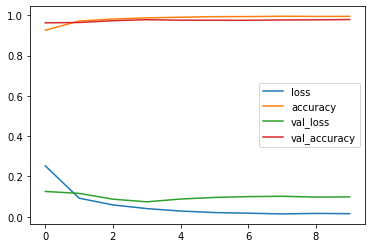

In [7]:
pd.DataFrame(hist.history).plot()

In [8]:
loss, acc = model.evaluate(X_test, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0923 - accuracy: 0.9783


In [9]:
print('accuracy of the model is: {:.2f}%'.format(acc*100))

accuracy of the model is: 97.83%


# Model Creation with Keras Functional API

In [10]:
inp_ = keras.Input(shape=784)
x = layers.Dense(512, activation='relu', name='fc1')(inp_)
x = layers.Dense(256, activation='relu', name='fc2')(x)
out = layers.Dense(10, name='fc3')(x)

model = keras.Model(inputs=(inp_), outputs=(out))
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
fc2 (Dense)                  (None, 256)               131328    
_________________________________________________________________
fc3 (Dense)                  (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

In [12]:
hist = model.fit(X_train, ytrain, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 3s 18ms/step - loss: 0.3071 - accuracy: 0.9127 - val_loss: 0.1398 - val_accuracy: 0.9598
Epoch 2/10
188/188 [==============================] - 3s 17ms/step - loss: 0.1125 - accuracy: 0.9668 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 3/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0712 - accuracy: 0.9785 - val_loss: 0.0923 - val_accuracy: 0.9733
Epoch 4/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0476 - accuracy: 0.9863 - val_loss: 0.0840 - val_accuracy: 0.9751
Epoch 5/10
188/188 [==============================] - 3s 17ms/step - loss: 0.0327 - accuracy: 0.9904 - val_loss: 0.0760 - val_accuracy: 0.9770
Epoch 6/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0848 - val_accuracy: 0.9746
Epoch 7/10
188/188 [==============================] - 3s 18ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.1005 - val_accuracy: 0.9722

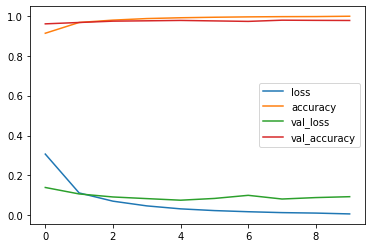

In [13]:
pd.DataFrame(hist.history).plot()

In [14]:
loss, acc = model.evaluate(X_test, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9794


In [15]:
print('accuracy of the model is: {:.2f}%'.format(acc*100))

accuracy of the model is: 97.94%
